In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

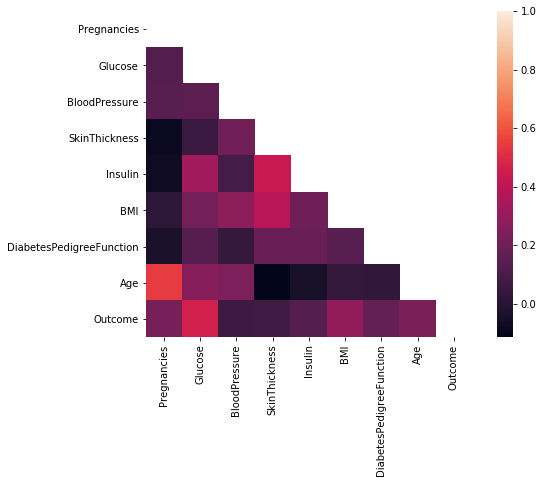

In [22]:
#Checking correlation between predictors and outcome, nothing is overly correlated. 
plt.figure(figsize = (9,6))
corr = df.corr()
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),square = True, mask = mask)

In [3]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


More information on predictors:
    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function(a measure of the hereditary risk one might have of getting    diabetes)
    Age: Age (years)
    Outcome: Class variable (0 or 1)

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
df.isna().sum() #Checking for NaN values, luckily there are none. 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

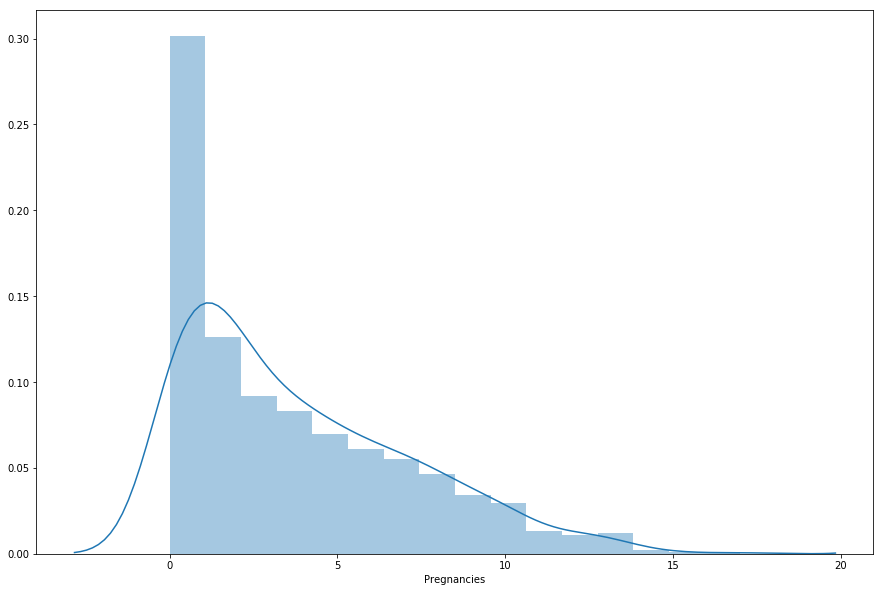

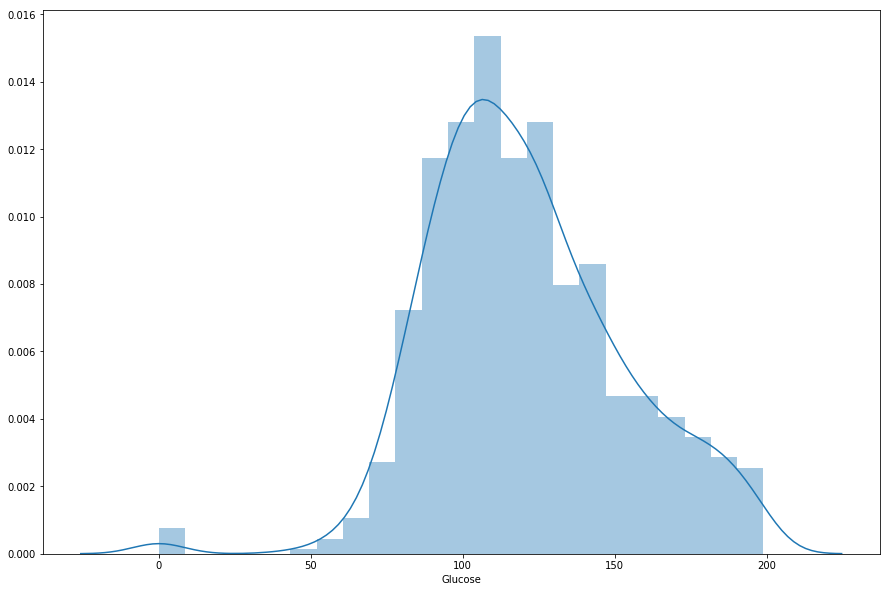

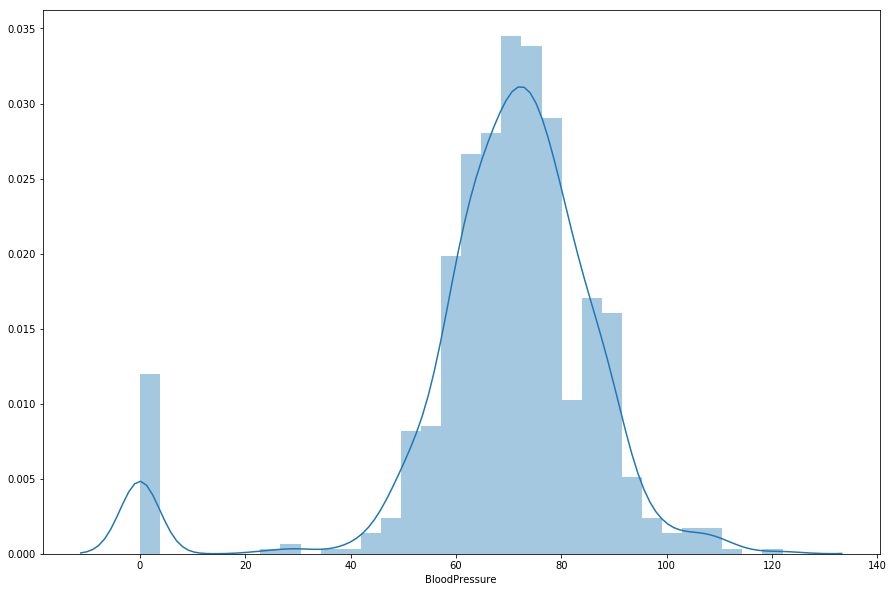

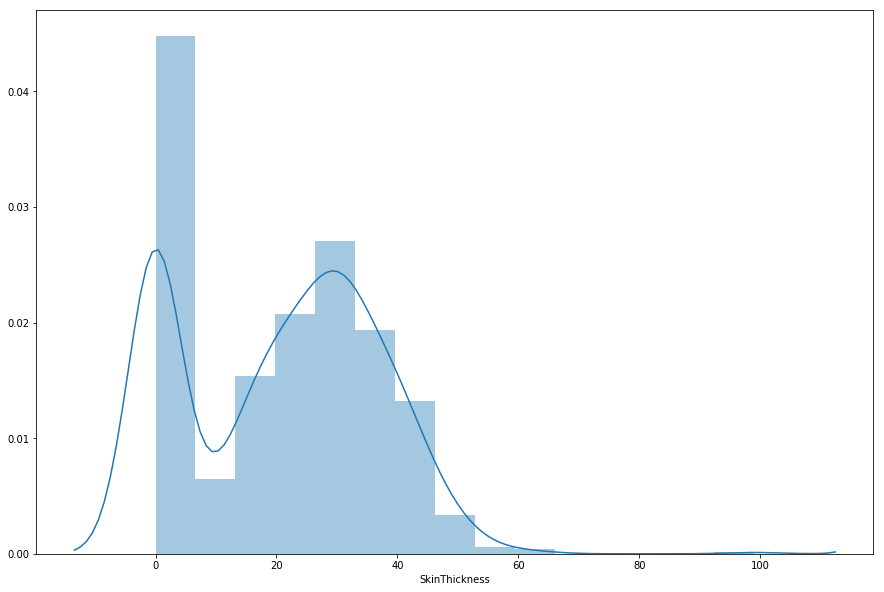

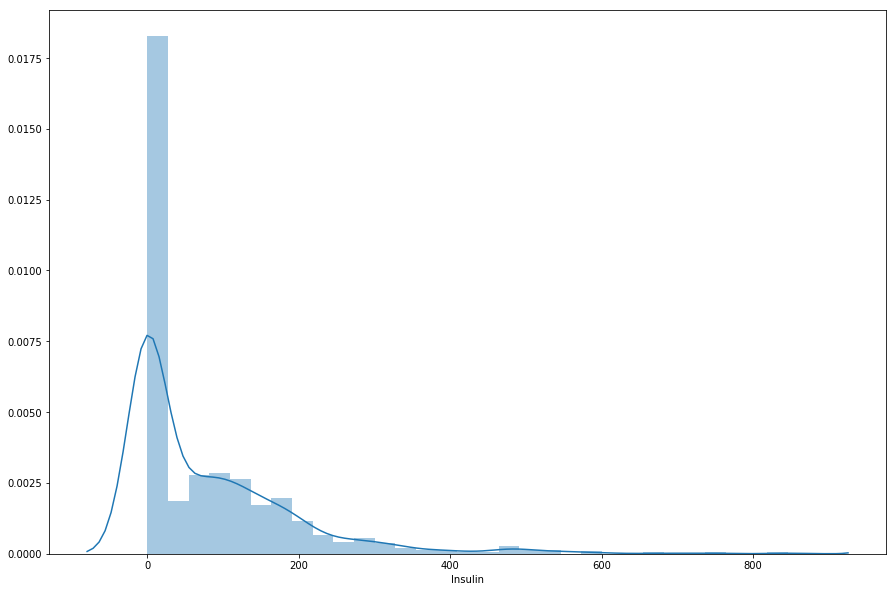

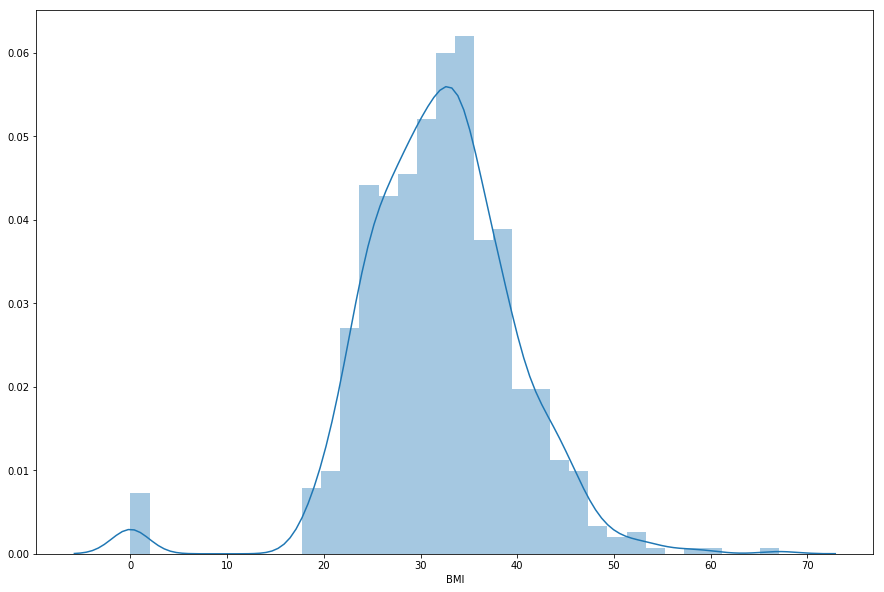

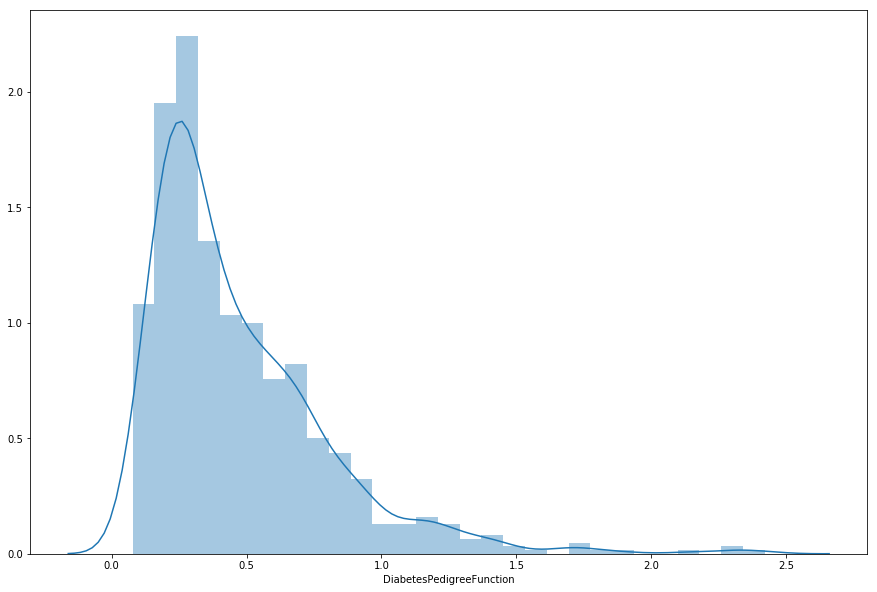

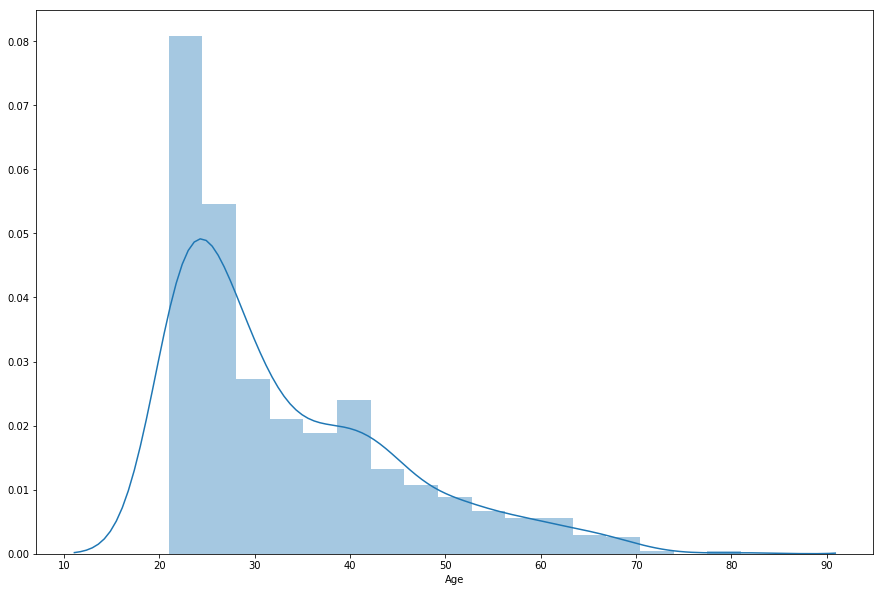

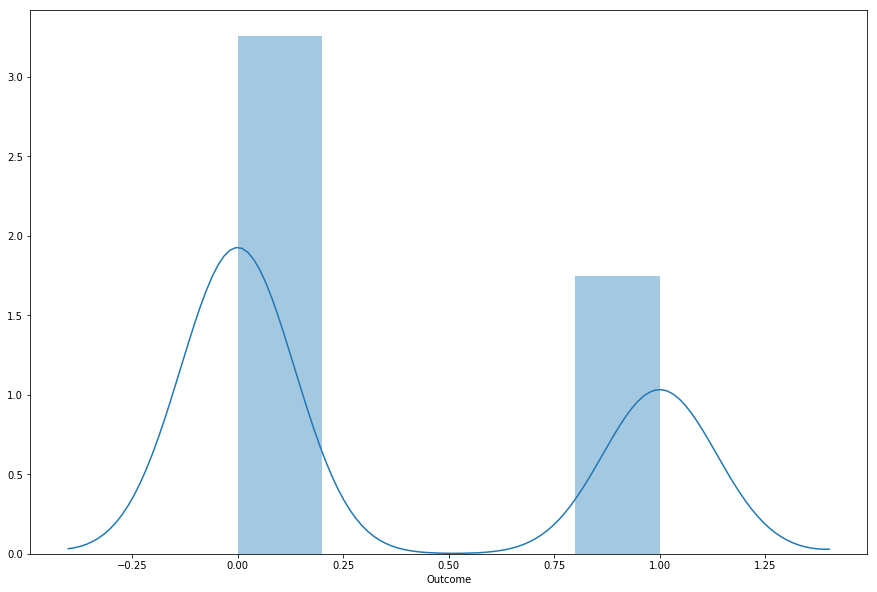

In [69]:
#Plotting distributions for each column
#First concern: Some 0 values for Glucose, BloodPressure, BMI, Insulin
#Second concern: Age is right skewed
#Third concern: Class imbalance 
for column in df.columns:
    plt.figure(figsize = (15,10))
    sns.distplot(df[column])

In [30]:
#Checking for class imbalance
df.Outcome.value_counts()
#May have to upsample positive outcomes later. 

0    500
1    268
Name: Outcome, dtype: int64

### Replacing zeroes in the data with the mean of the associated column if that column is normally distributed. 

In [90]:
df.loc[df.Glucose < 1].shape #These can be imputed with the mean

(5, 9)

In [91]:
df.Glucose.mean() #Glucose is normally distributed, so using the mean to replace zeros is fine

120.89453125

In [92]:
df.loc[df.Glucose < 1, 'Glucose'] = 120.89

In [93]:
df.loc[df.Glucose < 1].shape #Now 0 rows with glucose = 0

(0, 9)

In [80]:
df.loc[df.BloodPressure< 1].shape #These can also be imputed with the mean as well

(35, 9)

In [96]:
df.loc[df.BloodPressure > 0, 'BloodPressure'].mean() #Mean blood pressure for the columns that aren't zero

72.40518417462484

In [97]:
df.loc[df.BloodPressure < 1, 'BloodPressure'] = 72.41

In [98]:
df.loc[df.BloodPressure < 1].shape # Rows that used to have a blood pressure of 0 have been changed to match the mean.

(0, 9)

In [46]:
df.loc[df.BMI < 1].shape #These can be impouted with the mean

(11, 9)

In [99]:
df.loc[df.BMI > 0, 'BMI'].mean()

32.45746367239099

In [101]:
df.loc[df.BMI < 1, 'BMI'] = 32.46

In [102]:
df.loc[df.BMI < 1].shape

(0, 9)

In [195]:
df.Insulin.value_counts()
#Too many 0 values for insulin, dropping insulin column.

0      374
105     11
140      9
130      9
120      8
100      7
94       7
180      7
110      6
115      6
135      6
66       5
49       5
56       5
76       5
210      5
90       4
88       4
125      4
71       4
200      4
155      4
64       4
160      4
168      4
165      4
54       4
190      4
36       3
182      3
      ... 
191      1
166      1
188      1
184      1
171      1
119      1
255      1
318      1
91       1
310      1
81       1
304      1
300      1
183      1
86       1
291      1
89       1
284      1
280      1
258      1
278      1
277      1
275      1
274      1
272      1
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

In [197]:
df.drop(columns = ['Insulin'], axis = 1, inplace = True)

### Data Transformations and Dealing with Outliers

In [199]:
df1 = pd.read_csv('diabetes.csv')

In [200]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\ar344\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Age Distribution')

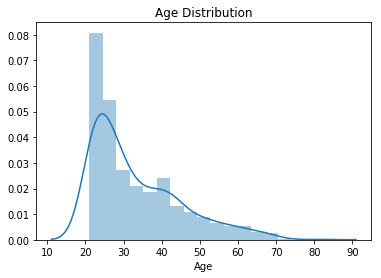

In [136]:
sns.distplot(df.Age)
plt.title('Age Distribution')

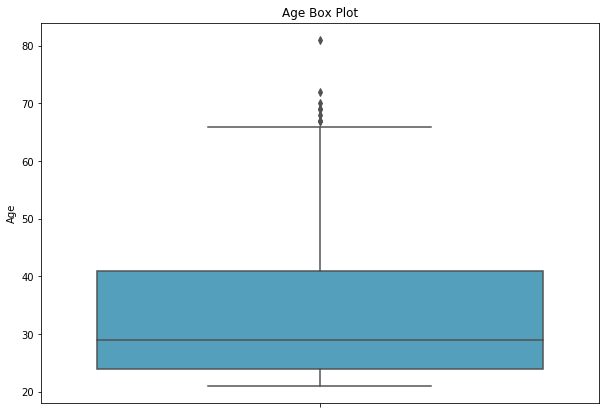

In [135]:
#Some age outliers are present but not really something to worry about.

plt.figure(figsize = (10,7))
sns.boxplot(y = 'Age', data = df, palette= 'GnBu_d').set_title('Age Box Plot')
plt.show() 

Text(0.5, 1.0, 'Diabetes Pedigree Function Distribution')

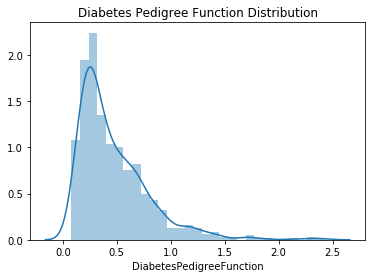

In [140]:
sns.distplot(df.DiabetesPedigreeFunction)
plt.title('Diabetes Pedigree Function Distribution')

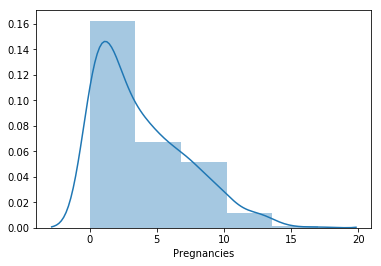

In [130]:
sns.distplot(df.Pregnancies, bins = 5) #Going to change pregnancies into a categorical variable instead. 

In [159]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

###### Changing Pregnancies and Ages into bins and then dummy variables

In [177]:
#Putting pregnancies into ranges and then into dummies
bins = [-1, 4, 9, 13, 18]
group_names = ['0 - 3', '4- 8', '9 - 12', '13 - 17']
pregnancies_categories = pd.cut(df.Pregnancies, bins, labels = group_names)

In [178]:
df['pregnancies_categories'] = pd.cut(df.Pregnancies, bins, labels = group_names)

In [180]:
df = pd.get_dummies(df, columns = ['pregnancies_categories'])

In [183]:
print(df.Age.min(), df.Age.max())

21 81


In [185]:
age_bins = [20, 25, 30, 40, 50, 60, 70, 82]
age_labels= ['20 - 24', '25 - 29', '30-39', '40 - 49', '50 - 59', '60 - 69', '70 - 81']
df['age_categories'] = pd.cut(df.Age , age_bins, labels = age_labels)

In [186]:
df = pd.get_dummies(df, columns = ['age_categories'])

In [189]:
df.drop(axis = 1, columns = ['Age', 'Pregnancies'], inplace = True)

In [201]:
df.head(5)

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,pregnancies_categories_0 - 3,pregnancies_categories_4- 8,pregnancies_categories_9 - 12,pregnancies_categories_13 - 17,age_categories_20 - 24,age_categories_25 - 29,age_categories_30-39,age_categories_40 - 49,age_categories_50 - 59,age_categories_60 - 69,age_categories_70 - 81
0,148.0,72.0,35,33.6,0.627,1,0,1,0,0,0,0,0,1,0,0,0
1,85.0,66.0,29,26.6,0.351,0,1,0,0,0,0,0,1,0,0,0,0
2,183.0,64.0,0,23.3,0.672,1,0,1,0,0,0,0,1,0,0,0,0
3,89.0,66.0,23,28.1,0.167,0,1,0,0,0,1,0,0,0,0,0,0
4,137.0,40.0,35,43.1,2.288,1,1,0,0,0,0,0,1,0,0,0,0


#### Checking For Outliers

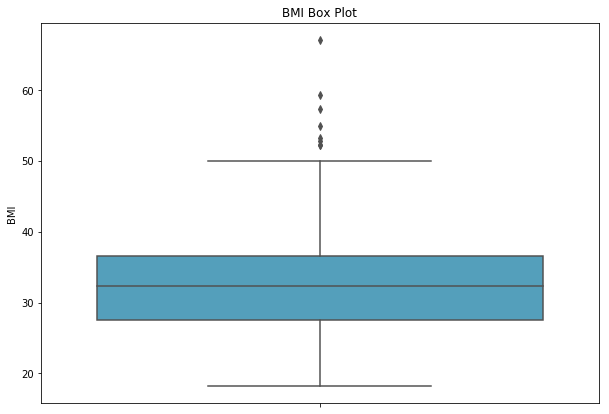

(8, 17)


In [202]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'BMI', data = df, palette= 'GnBu_d').set_title('BMI Box Plot')
plt.show() 
print(df.loc[df.BMI > 50].shape) #8 BMI outliers

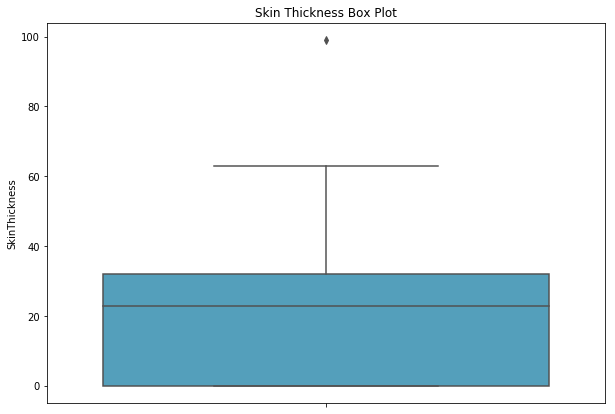

(227, 17)


In [229]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'SkinThickness', data = df, palette= 'GnBu_d').set_title('Skin Thickness Box Plot')
plt.show() 
print(df.loc[df.SkinThickness == 0].shape) #1 outlier, but 227 missing values labeled as zeroes.

In [228]:
#227 missing values. Skin thickness will be dropped since it can't be imputed.  
df_test = df.loc[df.SkinThickness > 0]
df_test.corr()

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Outcome,pregnancies_categories_0 - 3,pregnancies_categories_4- 8,pregnancies_categories_9 - 12,pregnancies_categories_13 - 17,age_categories_20 - 24,age_categories_25 - 29,age_categories_30-39,age_categories_40 - 49,age_categories_50 - 59,age_categories_60 - 69,age_categories_70 - 81
Glucose,1.000000,0.217532,0.227368,0.247179,0.160837,0.501680,-0.122002,0.116841,0.004057,0.063301,-0.231182,-0.008573,0.105474,0.029561,0.245802,0.057495,0.018272
BloodPressure,0.217532,1.000000,0.226690,0.309560,0.006882,0.185287,-0.215183,0.156838,0.139121,-0.006802,-0.300951,-0.013054,0.099558,0.182889,0.177874,0.085349,0.008903
SkinThickness,0.227368,0.226690,1.000000,0.647932,0.115016,0.259491,-0.145631,0.111146,0.074925,0.023471,-0.199708,0.049713,0.099942,0.079059,0.002314,0.094765,0.015814
BMI,0.247179,0.309560,0.647932,1.000000,0.150541,0.308586,-0.062142,0.025609,0.056013,0.052340,-0.161701,0.086321,0.056134,0.076035,0.007418,-0.018220,-0.043920
DiabetesPedigreeFunction,0.160837,0.006882,0.115016,0.150541,1.000000,0.225474,-0.007996,0.004175,0.017688,-0.026504,-0.054355,-0.072965,0.100729,0.003077,0.091899,-0.052524,-0.005573
Outcome,0.501680,0.185287,0.259491,0.308586,0.225474,1.000000,-0.247964,0.166437,0.138905,0.122225,-0.315478,-0.032299,0.147183,0.195308,0.205422,-0.021507,-0.030387
pregnancies_categories_0 - 3,-0.122002,-0.215183,-0.145631,-0.062142,-0.007996,-0.247964,1.000000,-0.844692,-0.378502,-0.130285,0.509677,0.134822,-0.210512,-0.450375,-0.259371,-0.051892,-0.064961
pregnancies_categories_4- 8,0.116841,0.156838,0.111146,0.025609,0.004175,0.166437,-0.844692,1.000000,-0.140302,-0.048294,-0.420894,-0.068580,0.225828,0.288316,0.190671,0.003321,0.076905
pregnancies_categories_9 - 12,0.004057,0.139121,0.074925,0.056013,0.017688,0.138905,-0.378502,-0.140302,1.000000,-0.021640,-0.208371,-0.123773,-0.001845,0.300212,0.169634,0.099115,-0.010790
pregnancies_categories_13 - 17,0.063301,-0.006802,0.023471,0.052340,-0.026504,0.122225,-0.130285,-0.048294,-0.021640,1.000000,-0.071724,-0.042604,0.013104,0.159588,-0.021640,-0.010574,-0.003714


In [230]:
df.drop(columns = ['SkinThickness'], axis = 1, inplace = True)

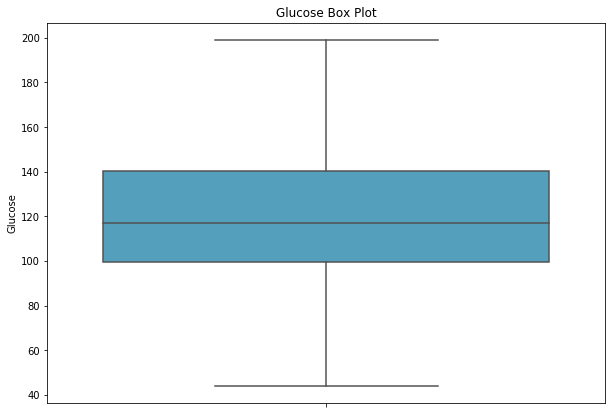

In [203]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'Glucose', data = df, palette= 'GnBu_d').set_title('Glucose Box Plot')
plt.show() 
#This might be the most beautiful box plot I've ever seen.

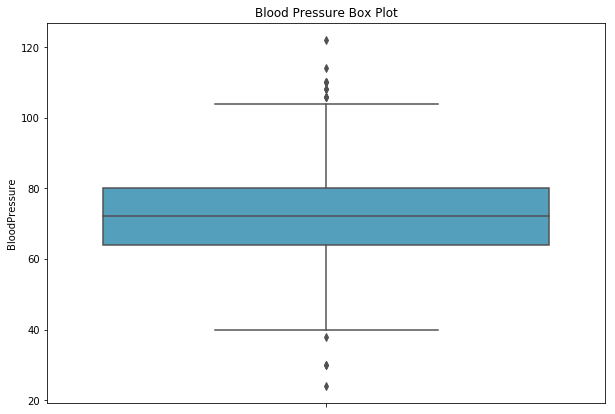

(10, 17) (4, 17)


In [206]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'BloodPressure', data = df, palette= 'GnBu_d').set_title('Blood Pressure Box Plot')
plt.show() 
print(df.loc[df.BloodPressure > 105].shape, df.loc[df.BloodPressure <40].shape) #14 outliers

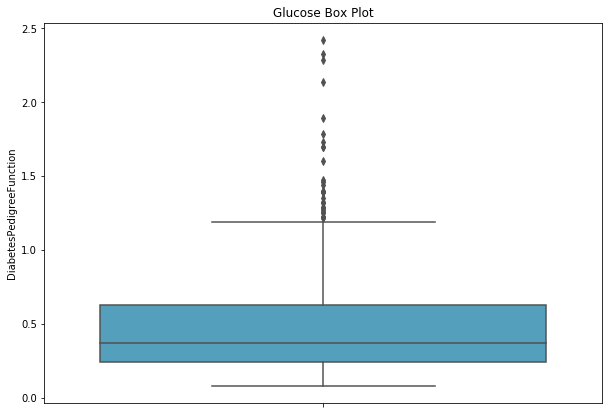

(42, 17)


In [210]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'DiabetesPedigreeFunction', data = df, palette= 'GnBu_d').set_title('Glucose Box Plot')
plt.show() 
print(df.loc[df.DiabetesPedigreeFunction > 1.1].shape)#About 42 outliers

In [225]:
df_test = df.loc[df.SkinThickness > 0]

In [231]:
df.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome,pregnancies_categories_0 - 3,pregnancies_categories_4- 8,pregnancies_categories_9 - 12,pregnancies_categories_13 - 17,age_categories_20 - 24,age_categories_25 - 29,age_categories_30-39,age_categories_40 - 49,age_categories_50 - 59,age_categories_60 - 69,age_categories_70 - 81
0,148.0,72.0,33.6,0.627,1,0,1,0,0,0,0,0,1,0,0,0
1,85.0,66.0,26.6,0.351,0,1,0,0,0,0,0,1,0,0,0,0
2,183.0,64.0,23.3,0.672,1,0,1,0,0,0,0,1,0,0,0,0
3,89.0,66.0,28.1,0.167,0,1,0,0,0,1,0,0,0,0,0,0
4,137.0,40.0,43.1,2.288,1,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Ai now time to standardize some ish

C:\Users\ar344\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


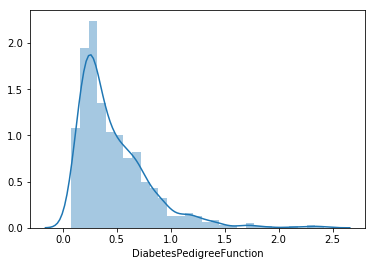

In [233]:
sns.distplot(df.DiabetesPedigreeFunction)

In [232]:
from sklearn import preprocessing

In [236]:
#Putting columns that will be normalized in a list
n_test = df[['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']]
cols_to_norm = ['Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction']
x = n_test.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
n_test = pd.DataFrame(x_scaled, columns = cols_to_norm)

In [239]:
new_df = df.drop(cols_to_norm, axis = 1)
new_df = pd.concat([n_test, new_df ], axis = 1)

In [240]:
new_df.head()#This new df has all the normalized values we need. 

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Outcome,pregnancies_categories_0 - 3,pregnancies_categories_4- 8,pregnancies_categories_9 - 12,pregnancies_categories_13 - 17,age_categories_20 - 24,age_categories_25 - 29,age_categories_30-39,age_categories_40 - 49,age_categories_50 - 59,age_categories_60 - 69,age_categories_70 - 81
0,0.670968,0.489796,0.314928,0.234415,1,0,1,0,0,0,0,0,1,0,0,0
1,0.264516,0.428571,0.171779,0.116567,0,1,0,0,0,0,0,1,0,0,0,0
2,0.896774,0.408163,0.104294,0.253629,1,0,1,0,0,0,0,1,0,0,0,0
3,0.290323,0.428571,0.202454,0.038002,0,1,0,0,0,1,0,0,0,0,0,0
4,0.600000,0.163265,0.509202,0.943638,1,1,0,0,0,0,0,1,0,0,0,0


In [242]:
new_df.to_csv('diabetes_final.csv')